# Elo Ratings

**Goal**: Elo ratings are unintuitive. I need an intuitive grasp of how to convert an Elo rating into a probability of winning.

What matters in Elo ratings is the **difference** between 2 players. This difference can be converted into the **probability of winning**.

A simple linear model says +100 Elo point difference means the player has a 60% chance of winning. This slighly **undercounts** the true probability. At larger differences, it starts to approach the true probability again.

Just remember:

$$
+100 \text{Elo} = 0.6 \text{prob win}
$$

## Figure

Text(0.5, 1.0, 'Probability of Winning in the Elo model vs. linear model:\n100 Elo difference ~ 0.6 probability of winning')

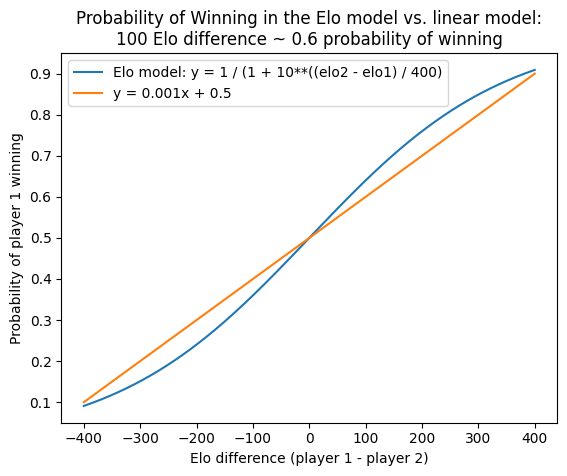

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def elo_to_prob(elo1, elo2):
    return 1 / (1 + 10**((elo2 - elo1) / 400))

# make a plot of this:
# x-axis: elo difference
# y-axis: win probability
# one line for each elo difference

elo_diffs = np.arange(-400, 401, 1)
win_probs = [elo_to_prob(elo, 0) for elo in elo_diffs]

plt.plot(elo_diffs, win_probs, label='Elo model: y = 1 / (1 + 10**((elo2 - elo1) / 400)')
plt.xlabel('Elo difference (player 1 - player 2)')
plt.ylabel('Probability of player 1 winning')

# what if we make this a straight line? (i.e. a linear model)

# let's make a linear model for this
# assume -400 is 0.1 and 400 is 0.9
# y = mx + b
# 0.1 = -400m + b
# 0.9 = 400m + b
# b = 0.5
# 0.1 = -400m + 0.5
# 0.9 = 400m + 0.5
# 0.4 = 400m
# m = 0.001
# y = 0.001x + 0.5

win_probs_linear = [0.001 * elo + 0.5 for elo in elo_diffs]
plt.plot(elo_diffs, win_probs_linear, label='y = 0.001x + 0.5')
plt.legend()

plt.title('Probability of Winning in the Elo model vs. linear model:\n100 Elo difference ~ 0.6 probability of winning');